In [1]:
# Import Dependencies
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
gkey=""
gmaps.configure(api_key=gkey)
import requests
import json

In [2]:
# Set File path for original Data Set
shark_attack_csv = 'data_files/clean_data.csv'

In [3]:
# Read CSV into a Data Frame
shark_df = pd.read_csv(shark_attack_csv, encoding='iso-8859-1')

In [4]:
shark_df.shape

(4033, 17)

In [5]:
#View Sample
shark_df

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month,Lat,Lng
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",BOARDING,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18.0,White shark,25.0,Jun,33.195870,-117.379483
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",SWIMMING,F,11.0,Minor injury to left thigh,N,14.0,Non-Disclosed,18.0,Jun,31.159591,-81.388552
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",SURFING,M,48.0,Injury to left lower leg from surfboard skeg,N,7.0,Non-Disclosed,9.0,Jun,21.305612,-158.030190
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURFING,M,NaN,Minor injury to lower leg,N,NaN,Non-Disclosed,8.0,Jun,-30.068611,153.195278
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,DIVING,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark,4.0,Jun,18.454353,-103.554131
5,3-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",SURFING,M,NaN,"No injury, board bitten",N,NaN,Non-Disclosed,3.0,Jun,-28.842363,153.601947
6,3-Jun-18,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",SWIMMING,M,18.0,FATAL,Y,NaN,Tiger shark,3.0,Jun,-8.172134,-34.915542
7,27-May-18,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",FISHING,M,52.0,Minor injury to foot. PROVOKED INCIDENT,N,NaN,Lemon shark,27.0,May,29.078526,-80.921845
8,26-May-18,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",SWIMMING,M,15.0,Lower left leg bitten,N,17.0,Bull shark,26.0,May,28.320007,-80.607551
9,26-May-18,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",SWIMMING,M,12.0,Minor injury to foot,N,14.0,Non-Disclosed,26.0,May,29.210815,-81.022833


In [6]:
shark_df.describe()

,Year,Age,Time,Day,Lat,Lng
count,4033.000000,2787.000000,2046.000000,3765.000000,3839.000000,3839.000000
mean,1994.787007,28.259419,16.869990,15.795750,11.454137,-27.018896
std,17.960343,14.186576,75.125569,8.909689,28.595783,99.824889
min,1960.000000,1.000000,0.000000,1.000000,-52.516254,-179.995748
25%,1981.000000,18.000000,11.000000,8.000000,-21.834660,-87.700819
50%,2000.000000,25.000000,13.000000,16.000000,26.794355,-80.069193
75%,2010.000000,37.000000,16.000000,24.000000,32.216316,31.012613
max,2018.000000,87.000000,2000.000000,31.000000,62.411363,179.849139


# 1.Is there a correlation between number of shark attacks and time of year?

### Month

In [7]:
bins=[0,1988,1998,2008,2019]
group_year=['1979-1988','1989-1998','1999-2008','2009-2018']
shark_df["Decade"] = pd.cut(shark_df["Year"], bins, labels=group_year, include_lowest=True)

In [8]:
year_1979_1988=shark_df[shark_df["Decade"]=="1979-1988"]
year_1979_1988=year_1979_1988.groupby("Month").count()['Decade']
year_1979_1988 = year_1979_1988[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

year_1989_1998=shark_df[shark_df["Decade"]=="1989-1998"]
year_1989_1998=year_1989_1998.groupby("Month").count()['Decade']
year_1989_1998 = year_1989_1998[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

year_1999_2008=shark_df[shark_df["Decade"]=="1999-2008"]
year_1999_2008=year_1999_2008.groupby("Month").count()['Decade']
year_1999_2008 = year_1999_2008[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

year_2009_2018=shark_df[shark_df["Decade"]=="2009-2018"]
year_2009_2018=year_2009_2018.groupby("Month").count()['Decade']
year_2009_2018 = year_2009_2018[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

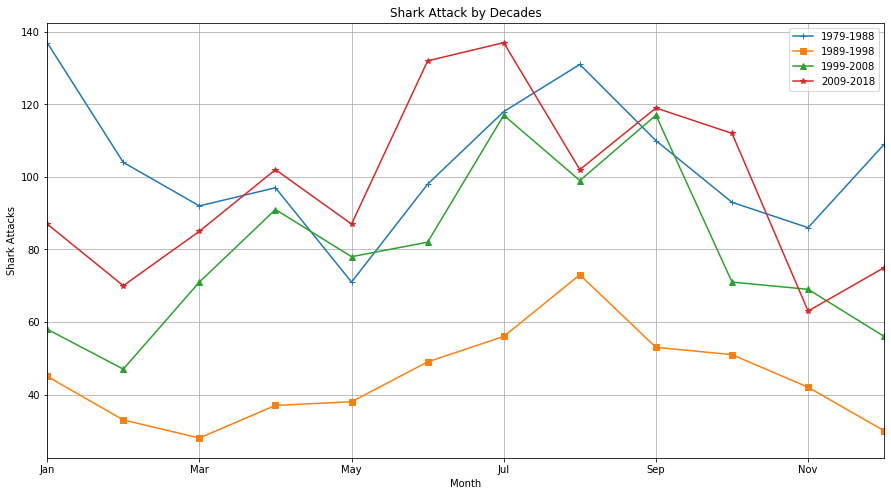

In [9]:
plt.figure(figsize=(15,8))
year_1979_1988.plot(label="1979-1988",marker="+")
year_1989_1998.plot(label="1989-1998", marker="s")
year_1999_2008.plot(label="1999-2008",marker="^")
year_2009_2018.plot(label="2009-2018",marker="*")
plt.title("Shark Attack by Decades")
plt.ylabel("Shark Attacks")
plt.legend(loc="best")
plt.grid()
plt.savefig("images/Shark Attack by Decades.png")
plt.show()

### Country

In [10]:
top_contries=shark_df.groupby("Country").count()['Month'].sort_values(ascending=False)[:5]
top_contries

Country
USA             1724
AUSTRALIA        697
SOUTH AFRICA     423
BRAZIL           103
BAHAMAS           90
Name: Month, dtype: int64

In [11]:
usa_df=shark_df[shark_df["Country"]=="USA"]
usa_df=usa_df.groupby("Month").count()['Country']
usa_df = usa_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

AUSTRALIA_df=shark_df[shark_df["Country"]=="AUSTRALIA"]
AUSTRALIA_df=AUSTRALIA_df.groupby("Month").count()['Country']
AUSTRALIA_df = AUSTRALIA_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

SOUTH_AFRICA_df=shark_df[shark_df["Country"]=="SOUTH AFRICA"]
SOUTH_AFRICA_df=SOUTH_AFRICA_df.groupby("Month").count()['Country']
SOUTH_AFRICA_df = SOUTH_AFRICA_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

BRAZIL_df=shark_df[shark_df["Country"]=="BRAZIL"]
BRAZIL_df=BRAZIL_df.groupby("Month").count()['Country']
BRAZIL_df = BRAZIL_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

BAHAMAS_df=shark_df[shark_df["Country"]=="BAHAMAS"]
BAHAMAS_df=BAHAMAS_df.groupby("Month").count()['Country']
BAHAMAS_df = BAHAMAS_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

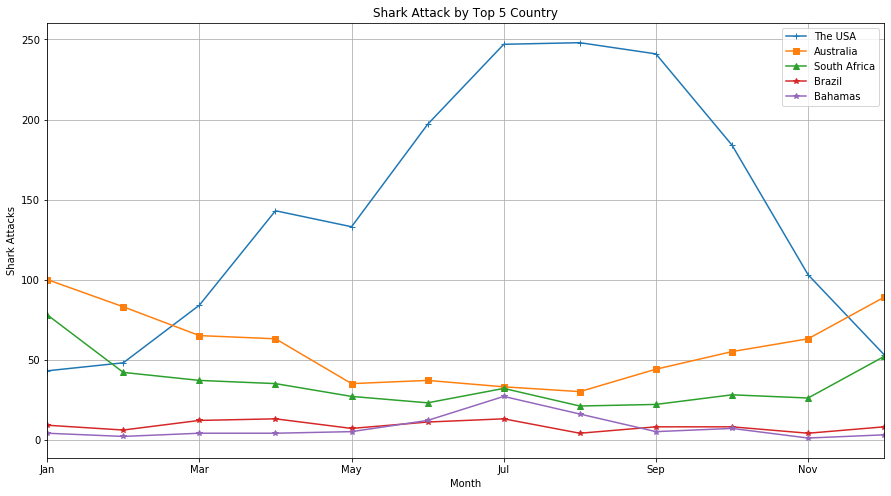

In [12]:
plt.figure(figsize=(15,8))
usa_df.plot(label="The USA",marker="+")
AUSTRALIA_df.plot(label="Australia", marker="s")
SOUTH_AFRICA_df.plot(label="South Africa",marker="^")
BRAZIL_df.plot(label="Brazil",marker="*")
BAHAMAS_df.plot(label="Bahamas",marker="*")
plt.title("Shark Attack by Top 5 Country")
plt.ylabel("Shark Attacks")
plt.legend(loc="best")
plt.grid()
plt.savefig("images/Shark Attack by Country.png")
plt.show()

# 2.Does the species of shark in an attack influence the severity of the attack?

## Total Attacks vs Species

In [73]:
Species_count=shark_df['Species'].value_counts().to_frame().reset_index()
Species_list=Species_count[Species_count['Species']<30]['index'].to_list()
for index, row in shark_df.iterrows():
    if row['Species'] in Species_list:
        shark_df.loc[index,'Species']="Others"

,index,Species
0,Non-Disclosed,2103
1,White shark,534
2,Invalid,333
3,Tiger shark,195
4,Bull shark,152
5,Blacktip reef shark,93
6,Nurse shark,71
7,Bronze whaler shark,64
8,Raggedtooth shark,41
9,Mako shark,41


In [89]:
shark_df['Species'].value_counts()

Non-Disclosed          2103
White shark             534
Invalid                 333
Others                  270
Tiger shark             195
Bull shark              152
Blacktip reef shark      93
Nurse shark              71
Bronze whaler shark      64
Raggedtooth shark        41
Mako shark               41
Wobbegong shark          39
Hammerhead shark         34
Lemon shark              33
Zambezi shark            30
Name: Species, dtype: int64

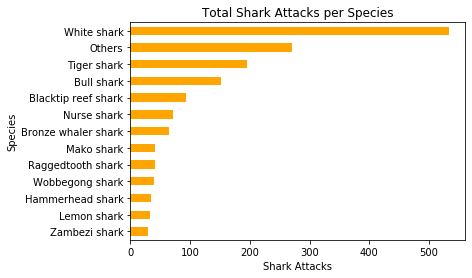

In [104]:
species_df = shark_df[(shark_df["Species"]!="Invalid") & 
                      (shark_df["Species"]!="Non-Disclosed")]['Species'].value_counts().sort_values()
species_chart=species_df.plot.barh(color='orange')
species_chart.set_title("Total Shark Attacks per Species")
species_chart.set_xlabel("Shark Attacks")
species_chart.set_ylabel("Species")
#plt.savefig("images/species.png")
plt.show()

## Fatal vs Species

In [98]:
grouped_species_df=shark_df[(shark_df["Fatal (Y/N)"]=="Y") & (shark_df["Species"]!="Invalid") 
                            & (shark_df["Species"]!="Non-Disclosed")].groupby("Species").count()
Fatal_Species=grouped_species_df['Fatal (Y/N)'].sort_values()
Fatal_Species

Species
Hammerhead shark        1
Mako shark              2
Bronze whaler shark     3
Others                  6
Zambezi shark           9
Bull shark             26
Tiger shark            47
White shark            98
Name: Fatal (Y/N), dtype: int64

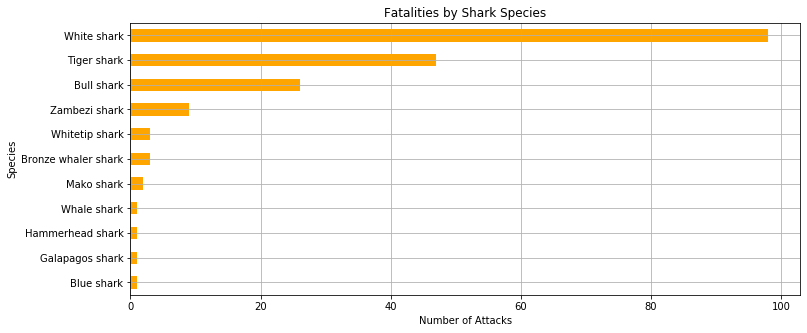

In [59]:
plt.figure(figsize=(12,5))
Fatal_chart=Fatal_Species.plot.barh(color='orange',title="Fatalities by Shark Species")
Fatal_chart.set_xlabel("Number of Attacks")
Fatal_chart.set_ylabel("Species")
plt.grid()
#plt.savefig("images/Shark Species.png")
plt.show()

In [102]:
Fatal_Species=Fatal_Species.to_frame().reset_index()
species=species_df.to_frame().reset_index()
species_merge=Fatal_Species.merge(species,left_on="Species",right_on="index")
species_merge

,Species_x,Fatal (Y/N),index,Species_y
0,Hammerhead shark,1,Hammerhead shark,34
1,Mako shark,2,Mako shark,41
2,Bronze whaler shark,3,Bronze whaler shark,64
3,Others,6,Others,270
4,Zambezi shark,9,Zambezi shark,30
5,Bull shark,26,Bull shark,152
6,Tiger shark,47,Tiger shark,195
7,White shark,98,White shark,534


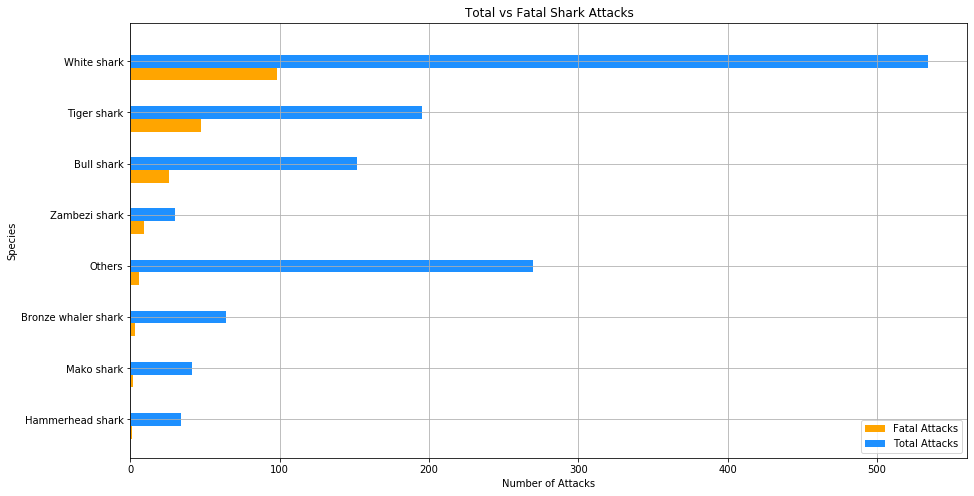

In [112]:
# set width of bar
barWidth=0.25
width=0.25
r1 = np.arange(len(activity_merge))
r2 = [x + barWidth for x in r1]

# Make the plot
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(r1, species_merge['Fatal (Y/N)'], width, color='orange', label='Fatal Attacks')
ax.barh(r2, species_merge['Species_y'], width, color='dodgerblue', label='Total Attacks')
 
ax.set(yticks=r2, yticklabels=species_merge['index'], ylim=[2*width - 1, len(species_merge)])
ax.legend()

plt.grid()
plt.ylabel("Species")
plt.xlabel("Number of Attacks")
plt.title("Total vs Fatal Shark Attacks")
plt.savefig("images/Species.png")
plt.show()

## locations for fatal shark attacks

In [131]:
plot_species_df=shark_df[(shark_df["Species"]=="White shark") | (shark_df["Species"]=="Hammerhead shark")
                        | (shark_df["Species"]=="Mako shark") | (shark_df["Species"]=="Bronze whaler shark")|
                        (shark_df["Species"]=="Zambezi shark")|(shark_df["Species"]=="Bull shark") |
                        (shark_df["Species"]=="Tiger shark")].reset_index(drop=True)

In [132]:
plot_species_df

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month,Lat,Lng,Decade
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",BOARDING,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18.0,White shark,25.0,Jun,33.195870,-117.379483,2009-2018
1,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,DIVING,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,Tiger shark,4.0,Jun,18.454353,-103.554131,2009-2018
2,3-Jun-18,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",SWIMMING,M,18.0,FATAL,Y,NaN,Tiger shark,3.0,Jun,-8.172134,-34.915542,2009-2018
3,26-May-18,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",SWIMMING,M,15.0,Lower left leg bitten,N,17.0,Bull shark,26.0,May,28.320007,-80.607551,2009-2018
4,28-Apr-18,2018,Unprovoked,COSTA RICA,Cocos Island,Manuelita,DIVING,M,30.0,"No injury, shark bit scuba gear",N,10.0,Tiger shark,28.0,Apr,NaN,NaN,2009-2018
5,24-Apr-18,2018,Unprovoked,AUSTRALIA,Western Australia,"South Point, Gracetown",SURFING,M,NaN,"No injury, shark struck his leg",N,NaN,White shark,24.0,Apr,-33.863822,114.976946,2009-2018
6,23-Apr-18,2018,Unprovoked,MALDIVES,Alifu Alifu Atoll,Madoogali,FISHING,M,32.0,5-inch cut to hand,N,21.0,Tiger shark,23.0,Apr,4.096008,72.752939,2009-2018
7,22-Apr-18,2018,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",BOATING,M,33.0,"No injury, shark bit hole in ski",N,9.0,White shark,22.0,Apr,-34.076111,23.370556,2009-2018
8,15-Apr-18,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,SWIMMING,M,54.0,Lacerations to foot and ankle,N,NaN,Bull shark,15.0,Apr,12.451359,99.978956,2009-2018
9,14-Apr-18,2018,Unprovoked,BAHAMAS,New Providence,Nirvana Beach,SURFING,M,NaN,No Injury. Shark swam away with the surf board,N,9.0,Tiger shark,14.0,Apr,25.063223,-77.488342,2009-2018


In [141]:
info_box_template = """
<dl>
<dt>Location</dt><dd>{Location}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
fatel_info = [info_box_template.format(**row) for index, row in plot_species_df.iterrows()]


In [139]:
marker_locations=plot_species_df[['Lat','Lng']].dropna()
fig3 = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(marker_locations)
fig3.add_layer(heatmap_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

## White shark location

In [150]:
Whiteshark_df = shark_df[shark_df['Species'] == "White shark"]
Whiteshark_df = Whiteshark_df[['Lat','Lng']].dropna()


fig6 = gmaps.figure()
fig6.add_layer(Whiteshark_df_layer)
fig6

Figure(layout=FigureLayout(height='420px'))

## All kind of fetal sharks

In [149]:
Whiteshark_df = shark_df[shark_df['Species'] == "White shark"]
Whiteshark_df = Whiteshark_df[['Lat','Lng']].dropna()

Hammerheadshark_df = shark_df[shark_df['Species'] == 'Hammerhead shark']
Hammerheadshark_df = Hammerheadshark_df[['Lat','Lng']].dropna()

Makoshark = shark_df[shark_df['Species'] == 'Mako shark']
Makoshark = Makoshark[['Lat','Lng']].dropna()

Bronze = shark_df[shark_df['Species'] == 'Bronze whaler shark']
Bronze = Bronze[['Lat','Lng']].dropna()

Zambezi = shark_df[shark_df['Species'] == "Zambezi shark"]
Zambezi = Zambezi[['Lat','Lng']].dropna()

Bull = shark_df[shark_df['Species'] == 'Bull shark"']
Bull = Bull[['Lat','Lng']].dropna()

Tigershark = shark_df[shark_df['Species'] == 'Tiger shark']
Tigershark = Tigershark[['Lat','Lng']].dropna()


Whiteshark_df_layer = gmaps.symbol_layer(
    Whiteshark_df, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 150, 0, 0.4)', scale=2
)

Hammerheadshark_layer = gmaps.symbol_layer(
    Hammerheadshark_df, fill_color='rgba(200, 0, 0, 0.4)',
    stroke_color='rgba(200, 0, 0, 0.4)', scale=2
)

Makoshark_layer = gmaps.symbol_layer(
    Makoshark, fill_color='rgba(51,51,255,0.2)',
    stroke_color='rgba(51,51,255,0.2)', scale=2
)

Bronze_layer = gmaps.symbol_layer(
    Bronze, fill_color='rgba(255,255,0,0.2)',
    stroke_color='rgba(255,255,0,0.2)', scale=2
)

Zambezi_layer = gmaps.symbol_layer(
    Zambezi, fill_color='rgba(255,51,204,0.2)',
    stroke_color='rgba(255,51,204,0.2)', scale=2
)

Bull_layer = gmaps.symbol_layer(
    Bull, fill_color='rgba(153,0,255,0.2)',
    stroke_color='rgba(153,0,255,0.2)', scale=2
)

Tigershark_layer = gmaps.symbol_layer(
    Tigershark, fill_color='rgba(153,51,0,0.2)',
    stroke_color='rgba(153,51,0,0.2)', scale=2
)


fig5 = gmaps.figure()
fig5.add_layer(Whiteshark_df_layer)
fig5.add_layer(Hammerheadshark_layer)
fig5.add_layer(Makoshark_layer)
fig5.add_layer(Bronze_layer)
fig5.add_layer(Zambezi_layer)
fig5.add_layer(Bull_layer)
fig5.add_layer(Tigershark_layer)
fig5

Figure(layout=FigureLayout(height='420px'))

# 3. Is there a correlation between aquatic activities and the likelihood of a shark attack?

In [21]:
shark_df['Activity']=shark_df['Activity'].replace({"STANDING":"OTHER"})
new_shark_df=shark_df[shark_df['Activity']!="UNKNOWN"]
activity_count=new_shark_df['Activity'].value_counts().sort_values()
activity_count

SHIPWRECK      76
BOARDING       91
BOATING       123
OTHER         170
DIVING        348
FISHING       736
SWIMMING     1042
SURFING      1173
Name: Activity, dtype: int64

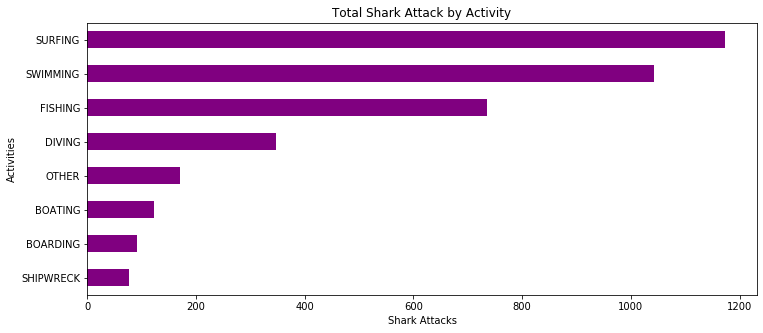

In [22]:
plt.figure(figsize=(12,5))
Fatal_chart=activity_count.plot.barh(color='purple', title="Total Shark Attack by Activity")
Fatal_chart.set_xlabel("Shark Attacks")
Fatal_chart.set_ylabel("Activities")
plt.savefig("images/Acticity and Shark attack.png")
plt.show()

## Fatal vs Activity

In [23]:
grouped_activity_df=new_shark_df[new_shark_df["Fatal (Y/N)"]=="Y"].groupby("Activity").count()['Fatal (Y/N)'].sort_values()
grouped_activity_df

Activity
BOATING        4
BOARDING       5
OTHER         27
SHIPWRECK     43
DIVING        67
SURFING       70
FISHING       73
SWIMMING     171
Name: Fatal (Y/N), dtype: int64

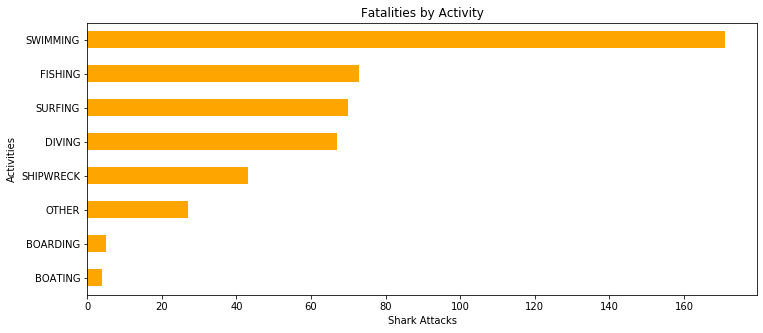

In [24]:
plt.figure(figsize=(12,5))
Fatal_chart=grouped_activity_df.plot.barh(color='orange', title="Fatalities by Activity")
Fatal_chart.set_xlabel("Shark Attacks")
Fatal_chart.set_ylabel("Activities")
plt.savefig("images/Fatalities by Activity.png")
plt.show()

In [25]:
grouped_activity=grouped_activity_df.to_frame().reset_index()
activity=activity_count.to_frame().reset_index()
activity_merge=activity.merge(grouped_activity,left_on="index",right_on="Activity")

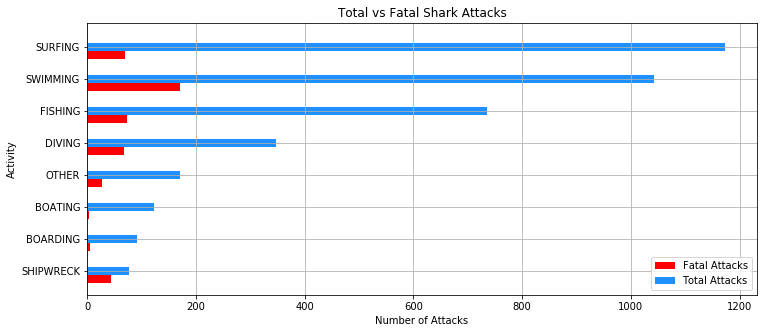

In [109]:
# set width of bar
barWidth=0.25
width=0.25
r1 = np.arange(len(activity_merge))
r2 = [x + barWidth for x in r1]

# Make the plot
fig, ax = plt.subplots(figsize=(12,5))
ax.barh(r1, activity_merge['Fatal (Y/N)'], width, color='red', label='Fatal Attacks')
ax.barh(r2, activity_merge['Activity_x'], width, color='dodgerblue', label='Total Attacks')
 
ax.set(yticks=r2, yticklabels=activity_merge['index'], ylim=[2*width - 1, len(activity_merge)])
ax.legend()

plt.grid()
plt.ylabel("Activity")
plt.xlabel("Number of Attacks")
plt.title("Total vs Fatal Shark Attacks")
plt.savefig("images/Activity.png")
plt.show()

# Plotting a basic map

In [32]:
marker_locations = shark_df[['Lat', 'Lng']].dropna()

# Create a marker_layer using the poverty list to fill the info box
fig = gmaps.figure()
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

# Heatmap

In [33]:
fatal_df=shark_df.groupby("Area").count()['Fatal (Y/N)'].to_frame().reset_index()
fatal_df

,Area,Fatal (Y/N)
0,Abaco Islands,21
1,"Admiralty Islands, Manus Province",2
2,Adriatic Sea,3
3,Aichi Prefecture,1
4,Alabama,11
5,Alagoas,1
6,Alaska,1
7,Alicante,3
8,Alicante Province,1
9,Alifu Alifu Atoll,1


In [204]:
# for index,row in fatal_df.iterrows():
#     target_area = row['Area']
#     target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
#                   'address={0}&key={1}').format(target_area, gkey)
#     geo_data = requests.get(target_url).json()

#     try:
#         print(f"Retrieving Row {index}, Area: {target_area}.")
#         fatal_df.loc[index,'Area_Lat']=geo_data['results'][0]['geometry']['location']['lat']
#         fatal_df.loc[index,'Area_Lng']=geo_data['results'][0]['geometry']['location']['lng']

    
#     except:
#         fatal_df.loc[index,'Area_Lat']=np.nan
#         fatal_df.loc[index,'Area_Lng']=np.nan
#         print(f"Oops, Record {index} Area: {target_area} not found! ")

Retrieving Row 0, Area: Abaco Islands.
Retrieving Row 1, Area: Admiralty Islands, Manus Province.
Retrieving Row 2, Area: Adriatic Sea.
Retrieving Row 3, Area: Aichi Prefecture.
Retrieving Row 4, Area: Alabama.
Retrieving Row 5, Area: Alagoas.
Retrieving Row 6, Area: Alaska.
Retrieving Row 7, Area: Alicante.
Retrieving Row 8, Area: Alicante Province.
Retrieving Row 9, Area: Alifu Alifu Atoll.
Retrieving Row 10, Area: Alinglaplap Atoll.
Retrieving Row 11, Area: Altagracia Province.
Retrieving Row 12, Area: Ambergris Caye.
Retrieving Row 13, Area: Anatolia.
Retrieving Row 14, Area: Andikira Fokithes.
Retrieving Row 15, Area: Andros Islands.
Retrieving Row 16, Area: Anjouan.
Retrieving Row 17, Area: Antalya Province.
Retrieving Row 18, Area: Antarctic Ocean.
Retrieving Row 19, Area: Antibes.
Retrieving Row 20, Area: Antigua.
Retrieving Row 21, Area: Antofagasta Province.
Retrieving Row 22, Area: Antsiranana Province.
Retrieving Row 23, Area: Anzoategui.
Retrieving Row 24, Area: Ascension 

Retrieving Row 197, Area: Loyalty Islands.
Retrieving Row 198, Area: Luzon Island.
Retrieving Row 199, Area: Madang.
Retrieving Row 200, Area: Madang Province.
Retrieving Row 201, Area: Madeira Islands.
Retrieving Row 202, Area: Mafia Island.
Retrieving Row 203, Area: Magdalena Department.
Retrieving Row 204, Area: Maine.
Retrieving Row 205, Area: Majorca.
Retrieving Row 206, Area: Makira-Ulawa Province.
Retrieving Row 207, Area: Malampa Province.
Retrieving Row 208, Area: Malaysia.
Retrieving Row 209, Area: Manfredonia .
Retrieving Row 210, Area: Manila.
Retrieving Row 211, Area: Manus Island.
Retrieving Row 212, Area: Maputo Province.
Retrieving Row 213, Area: MaranhÃ£o.
Retrieving Row 214, Area: Marches Region.
Retrieving Row 215, Area: Marovo Lagoon.
Oops, Record 215 Area: Marovo Lagoon not found! 
Retrieving Row 216, Area: Marquesas.
Retrieving Row 217, Area: Maryland.
Retrieving Row 218, Area: Massachusetts.
Retrieving Row 219, Area: Mercury Islands.
Retrieving Row 220, Area: Mer

Retrieving Row 397, Area: Tyrrhenian Sea.
Retrieving Row 398, Area: UNKNOWN.
Retrieving Row 399, Area: US Virgin Islands.
Retrieving Row 400, Area: Umm al Qaywayan Province.
Retrieving Row 401, Area: United Arab Emirates.
Retrieving Row 402, Area: Upolu Island.
Retrieving Row 403, Area: Valpariso Province.
Retrieving Row 404, Area: Vanua Levu.
Retrieving Row 405, Area: Vava.
Retrieving Row 406, Area: Vavau.
Retrieving Row 407, Area: Venice Province.
Retrieving Row 408, Area: Veracruz.
Retrieving Row 409, Area: Victoria.
Retrieving Row 410, Area: Virginia.
Retrieving Row 411, Area: Vis Island.
Retrieving Row 412, Area: Viscayan Sea.
Retrieving Row 413, Area: Vita Levu.
Retrieving Row 414, Area: Viti Levu.
Retrieving Row 415, Area: Vitu Levu.
Retrieving Row 416, Area: Wakaya Island.
Retrieving Row 417, Area: Wakayama Prefecture.
Retrieving Row 418, Area: Wake Island.
Retrieving Row 419, Area: Walkers Cay.
Retrieving Row 420, Area: Wallis and Futuna.
Retrieving Row 421, Area: Washington.


In [230]:
#fatal_df.to_csv("data_files/fatal_data.csv", index=False, header=True)

In [206]:
# fatal_df=fatal_df.dropna()

In [209]:
# fatal_df['Area_Lat']=fatal_df['Area_Lat'].astype(float)
# fatal_df['Area_Lng']=fatal_df['Area_Lng'].astype(float)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
fatal_df=pd.read_csv('data_files/fatal_data.csv')

In [35]:
# Store latitude and longitude in locations
locations = fatal_df[["Area_Lat", "Area_Lng"]]
fatal_value = fatal_df["Fatal (Y/N)"].astype(float)
maxfatal = fatal_value.max()

In [36]:
fig2 = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=fatal_value,
                                 dissipating=False, max_intensity=maxfatal,
                                 point_radius=10)
fig2.add_layer(heat_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [107]:
import gmplot
latitudes = fatal_df["Area_Lat"]
longitudes = fatal_df["Area_Lng"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(34.0522, -118.2437, 3)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("my_heatmap.html")

# Total shark attacks heatmap

In [37]:
import geopandas as gpd
shapefile = 'shape_file/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
grouped_data=shark_df.groupby('Country').count()['Date'].to_frame().reset_index()
grouped_data['Country']=grouped_data['Country'].str.lower()
gdf['country']=gdf['country'].str.lower()
grouped_data.replace('usa','united states of america', inplace = True)

#Merge dataframes gdf and df_2016.
merged = gdf.merge(grouped_data, left_on = 'country', right_on = 'Country')

#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [39]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.models import Slider, HoverTool
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 80)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '10': '10', '20':'20', '30':'30', '40':'40', '50':'50', '60':'60','70':'70', '80': '>80'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('Shark Attack', '@Date')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=10, width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Total Shark Attack', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Date', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

# Fatalities Heatmap

In [40]:
Fatal_value=shark_df[shark_df['Fatal (Y/N)']=="Y"]
fatal_df=Fatal_value[['Country','Fatal (Y/N)']].reset_index(drop=True)
sum_df=fatal_df.groupby('Country').count().reset_index()
sum_df['Country']=sum_df['Country'].str.lower()
sum_df.replace('usa','united states of america', inplace = True)
merged_fatal=merged.merge(sum_df,on="Country",how="left")
merged_fatal.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True)
merged_fatal['Fatal']=merged_fatal['Fatal'].fillna(0)

In [41]:
#Read data to json.
merged_json = json.loads(merged_fatal.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [42]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.models import Slider, HoverTool
from bokeh.palettes import brewer

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][5]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 50)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '10': '10', '20':'20', '30':'30', '40':'40', '50':'>50'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('Fatalities', '@Fatal')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=10, width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Fatalities by Shark Attack', plot_height = 600 , plot_width = 950, toolbar_location = None,tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Fatal', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

# Date 

## Year

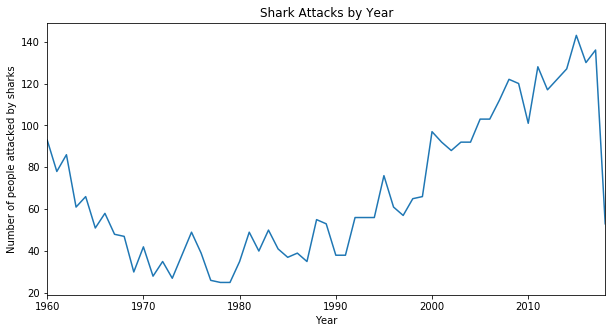

In [10]:
plt.figure(figsize=(10,5))
Years_values = shark_df['Year'].value_counts().sort_index()
year_chart=Years_values.plot(title="Shark Attacks by Year")
year_chart.set_xlabel("Year")
year_chart.set_ylabel("Number of people attacked by sharks")
plt.savefig("images/Shark attack by year.png")
plt.show()

## Month

In [11]:
shark_df

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month,Lat,Lng
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",BOARDING,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18.0,White shark,25.0,Jun,33.195870,-117.379483
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",SWIMMING,F,11.0,Minor injury to left thigh,N,14.0,Non-Disclosed,18.0,Jun,31.159591,-81.388552
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",SURFING,M,48.0,Injury to left lower leg from surfboard skeg,N,7.0,Non-Disclosed,9.0,Jun,21.305612,-158.030190
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURFING,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8.0,Jun,-30.068611,153.195278
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,DIVING,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4.0,Jun,18.454353,-103.554131
5,3-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",SURFING,M,NaN,"No injury, board bitten",N,NaN,Non-Disclosed,3.0,Jun,-28.842363,153.601947
6,3-Jun-18,2018,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",SWIMMING,M,18.0,FATAL,Y,NaN,Tiger shark,3.0,Jun,-8.172134,-34.915542
7,27-May-18,2018,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",FISHING,M,52.0,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'",27.0,May,29.078526,-80.921845
8,26-May-18,2018,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",SWIMMING,M,15.0,Lower left leg bitten,N,17.0,"Bull shark, 6'",26.0,May,28.320007,-80.607551
9,26-May-18,2018,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",SWIMMING,M,12.0,Minor injury to foot,N,14.0,Non-Disclosed,26.0,May,29.210815,-81.022833


In [12]:
Month_df=shark_df['Month'].value_counts().to_frame()
month_shark_df=Month_df.iloc[:len(Month_df)-1,].transpose()
month_shark_df = month_shark_df[['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
month_shark_df=month_shark_df.transpose()

<Figure size 720x360 with 0 Axes>

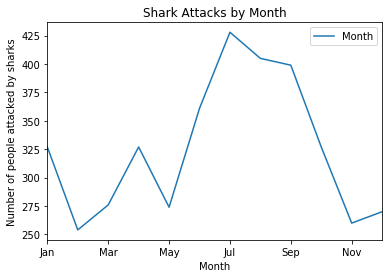

In [13]:
plt.figure(figsize=(10,5))
month_chart=month_shark_df.plot(title="Shark Attacks by Month")
month_chart.set_xlabel("Month")
month_chart.set_ylabel("Number of people attacked by sharks")
plt.savefig("images/Shark attack by month.png")
plt.show()

## Day

In [14]:
shark_df.Day.unique()

array([25., 18.,  9.,  8.,  4.,  3., 27., 26., 24., 21., 13., 12., 30.,
       28., 23., 22., 19., 15., 14., 10.,  5., 31., 11.,  1., 20., 16.,
       17.,  6.,  2., 29.,  7., nan])

In [15]:
shark_df_day=shark_df.Day.value_counts()
new_day_df=shark_df_day.reset_index()
new_day_df['index']=new_day_df['index'].astype(int)
new_day_df=new_day_df.sort_values(by="index").reset_index(drop=True).set_index("index")

<Figure size 720x360 with 0 Axes>

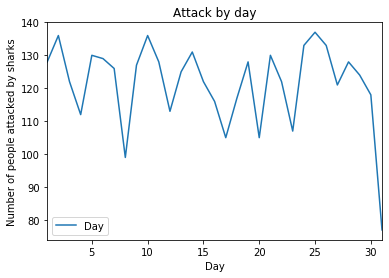

In [16]:
plt.figure(figsize=(10,5))
day_chart=new_day_df.plot(kind="line",title="Attack by day")
day_chart.set_xlabel("Day")
day_chart.set_ylabel("Number of people attacked by sharks")
plt.savefig("images/Shark attack by day.png")
plt.show()

# Time 

In [19]:
shark_df.head()

,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Day,Month,Lat,Lng
0,25-Jun-18,2018,Boating,USA,California,"Oceanside, San Diego County",BOARDING,F,57.0,"No injury to occupant, outrigger canoe and pad...",N,18.0,White shark,25.0,Jun,33.195870,-117.379483
1,18-Jun-18,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",SWIMMING,F,11.0,Minor injury to left thigh,N,14.0,Non-Disclosed,18.0,Jun,31.159591,-81.388552
2,9-Jun-18,2018,Invalid,USA,Hawaii,"Habush, Oahu",SURFING,M,48.0,Injury to left lower leg from surfboard skeg,N,7.0,Non-Disclosed,9.0,Jun,21.305612,-158.030190
3,8-Jun-18,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,SURFING,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,8.0,Jun,-30.068611,153.195278
4,4-Jun-18,2018,Provoked,MEXICO,Colima,La Ticla,DIVING,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",4.0,Jun,18.454353,-103.554131


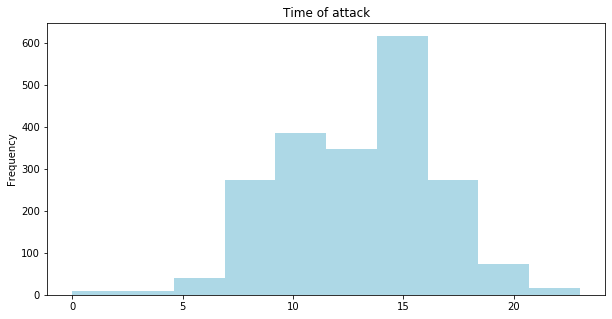

In [20]:
plt.figure(figsize=(10,5))
shark_df_time = shark_df[shark_df['Time']<25]['Time']
shark_df_time.plot(kind='hist', color='lightblue', title= "Time of attack")
plt.savefig("images/shark attacks by time.png")
plt.show()

# Fatal

In [21]:
shark_df['Fatal (Y/N)'].unique()

array(['N', 'Y', 'Uncomfirmed'], dtype=object)

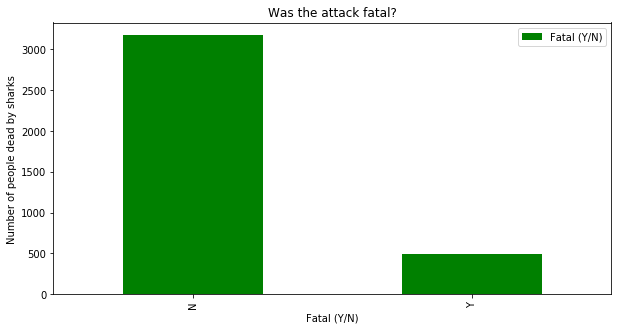

In [22]:
plt.figure(figsize=(10,5))
Fatal_value=shark_df[shark_df['Fatal (Y/N)'].isin(['Y','N'])]["Fatal (Y/N)"].value_counts()
Fatal_chart=Fatal_value.plot(kind='bar', title= "Was the attack fatal?", legend = True, color= 'green')
Fatal_chart.set_xlabel("Fatal (Y/N)")
Fatal_chart.set_ylabel("Number of people dead by sharks")
plt.savefig("images/was the attack fatel.png")
plt.show()

# Injury

In [27]:
shark_df['Injury'].value_counts()[:10]

FATAL                      279
Foot bitten                 68
Survived                    65
No injury                   55
Left foot bitten            48
Leg bitten                  47
Right foot bitten           39
No injury, board bitten     31
No details                  26
Hand bitten                 21
Name: Injury, dtype: int64

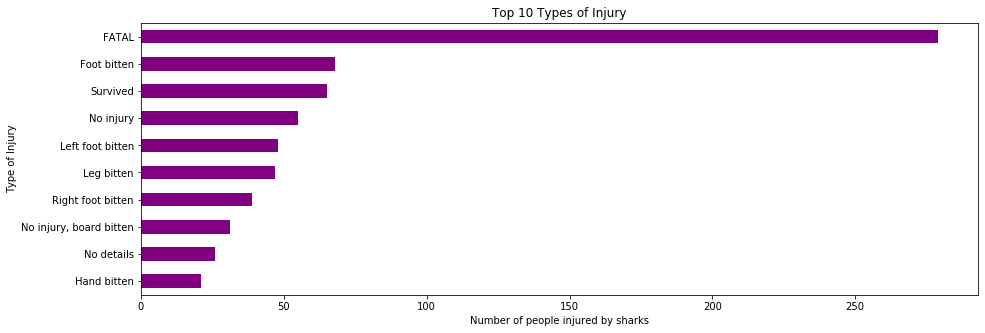

In [28]:
plt.figure(figsize=(15,5))
Injury_value=shark_df['Injury'].value_counts()[:10].sort_values()
Injury_chart=Injury_value.plot.barh(color='purple',title="Top 10 Types of Injury")
Injury_chart.set_xlabel("Number of people injured by sharks")
Injury_chart.set_ylabel("Type of Injury")
plt.savefig("images/Top 10 Types of Injury.png")
plt.show()

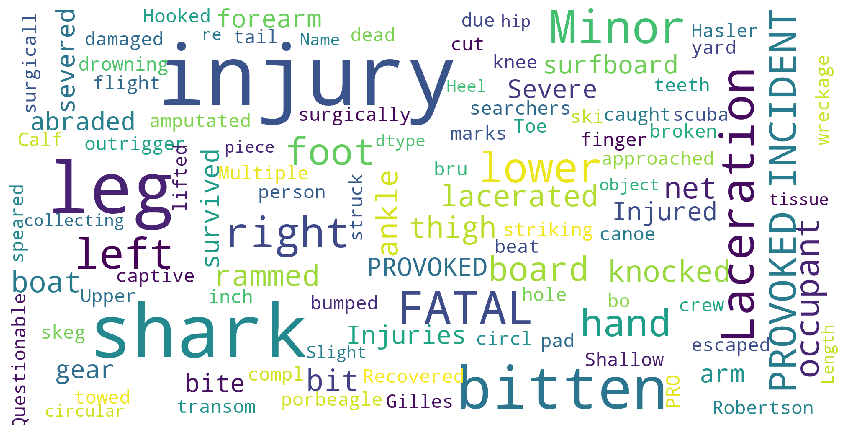

In [29]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,
                      max_words=200,max_font_size=40, scale=5,
                      random_state=1).generate(str(shark_df['Injury']))

fig = plt.figure(1, figsize=(15,15))
plt.axis('off')
plt.imshow(wordcloud)
plt.savefig("images/words of injury.png")
plt.show()